<a href="https://colab.research.google.com/github/Jenfree/Vanguard_Capstone/blob/master/EDA/Capstone_Data_Cleaning_%26_Frequency_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import string
import seaborn as sns
from datetime import datetime

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link_g1 = 'https://drive.google.com/open?id=1bOI0ZAHwJ0iW-7Be79g7q0QSJm-iAZl3' # The shareable link
link_g2 = 'https://drive.google.com/open?id=1srJkLe-lMlPKXIqPxCQIVV8PdguZf1oL'

fluff_1, id_1 = link_g1.split('=')
print(id_1) # Verify that you have everything after '='
fluff_2, id_2 = link_g2.split('=')
print(id_2)

downloaded_g1 = drive.CreateFile({'id':id_1}) 
downloaded_g1.GetContentFile('news_guardian_1.csv')  
g1_df = pd.read_csv('news_guardian_1.csv')

downloaded_g2 = drive.CreateFile({'id':id_2}) 
downloaded_g2.GetContentFile('news_guardian_2.csv')  
g2_df = pd.read_csv('news_guardian_2.csv')

g1_df = g1_df.rename(columns = {'url': 'URL', 'content': 'text', 'timestamp': 'publish_date'})
g2_df = g2_df.rename(columns = {'url': 'URL', 'content': 'text', 'timestamp': 'publish_date'})

guardian_news = pd.concat([g1_df, g2_df])
guardian_news = guardian_news[~guardian_news['text'].isna()]

1bOI0ZAHwJ0iW-7Be79g7q0QSJm-iAZl3
1srJkLe-lMlPKXIqPxCQIVV8PdguZf1oL


In [0]:
guardian_news_filtered = guardian_news[guardian_news['text'].str.contains("tariff")].reset_index(drop=True)

In [0]:
def read_df(link, name, column):
  
  fluff, id = link.split('=')
  print (id) # Verify that you have everything after '='
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(name)  
  df = pd.read_csv(name)
  df.drop_duplicates(subset=column, inplace=True)
  df.reset_index(inplace=True)
  
  return df

In [6]:
dailymail = read_df("https://drive.google.com/open?id=1AEYsszgTZAUO5DXPnKxCSmmSxosJNpSi", "dailymail.csv", "URL")
business = read_df("https://drive.google.com/open?id=19rkBsAybTHw6dDEcRItirqw4_rUgQNSr", "business_scrap.csv", "URL")
financialexpress = read_df("https://drive.google.com/open?id=1ST874ZAQ614Iqcv807PCLnhfrysojHuJ", "financialexpress.csv", "URL")
bing = read_df("https://drive.google.com/open?id=19E5Qt6H7tI86L91rSDn6m7ozknzkNph9", "news_Bing.csv", "url")
kitco = read_df("https://drive.google.com/open?id=1f-qntO0mvZFWWbsgo487cvn_PZpQlEas", "news_kitco.csv", "url")
thehill = read_df("https://drive.google.com/open?id=1tHUK_JID7vqGRmNNw5gYObZqxsxvDRvl", "news_thehill.csv", "url")
washington = read_df("https://drive.google.com/open?id=1LpFUQTFyWbZ1_IVs5AcLedywtMaIncvq", "news_washington.csv", "url")
cnbc = read_df("https://drive.google.com/open?id=1q-I8rWpJfIUZryUqdCfr9QxdQULNNrEe", "cnbc_web.csv", "URL")
mix = read_df("https://drive.google.com/open?id=1LDxH_mvG-doNFkAX8hiVfjdsRbtyRoJn", "thisismoney+bnnbloomberg.csv", "docid")

1AEYsszgTZAUO5DXPnKxCSmmSxosJNpSi
19rkBsAybTHw6dDEcRItirqw4_rUgQNSr
1ST874ZAQ614Iqcv807PCLnhfrysojHuJ
19E5Qt6H7tI86L91rSDn6m7ozknzkNph9
1f-qntO0mvZFWWbsgo487cvn_PZpQlEas
1tHUK_JID7vqGRmNNw5gYObZqxsxvDRvl
1LpFUQTFyWbZ1_IVs5AcLedywtMaIncvq
1q-I8rWpJfIUZryUqdCfr9QxdQULNNrEe
1LDxH_mvG-doNFkAX8hiVfjdsRbtyRoJn


In [0]:
mix['publish_date'] = pd.to_datetime(mix.year*10000+mix.month*100+mix.day,format='%Y%m%d')

dailymail = dailymail[["URL", "text", "publish_date"]]
business = business[["URL", "content", "publish_date"]]
financialexpress = financialexpress[["URL", "text", "publish_date"]]
kitco = kitco[["url", "text", "date"]]
thehill = thehill[["url", "text", "date"]]
washington = washington[["url", "text", "date"]]
g1_df = g1_df[["URL", "text", "publish_date"]]
g2_df = g2_df[["URL", "text", "publish_date"]]
cnbc = cnbc[["URL", "content", "PUBLISHED_TIME"]]
mix = mix[["docid", "content", "publish_date"]]

thisismoney = mix[mix.loc[:,'content'].str[0:11]!='(Bloomberg)'].reset_index(drop=True)
bloomberg = mix[mix.loc[:,'content'].str[0:11]=='(Bloomberg)'].reset_index(drop=True)

In [0]:
business.columns = ["URL", "text", "publish_date"]
financialexpress.columns = ["URL", "text", "publish_date"]
kitco.columns = ["URL", "text", "publish_date"]
thehill.columns = ["URL", "text", "publish_date"]
washington.columns = ["URL", "text", "publish_date"]
cnbc.columns = ["URL", "text", "publish_date"]
thisismoney.columns = ["URL", "text", "publish_date"]
bloomberg.columns = ["URL", "text", "publish_date"]

In [0]:
dailymail['source'] = 'Daily Mail'
business['source'] = 'Business Finance'
financialexpress['source'] = 'Financial Express'
kitco['source'] = 'Kitco'
thehill['source'] = 'The Hill'
washington['source'] = 'Washington'
cnbc['source'] = "CNBC"
thisismoney['source'] = "This Is Money"
bloomberg['source'] = "Bloomberg"
guardian_news_filtered['source'] = "Guardian"

In [0]:
alldata = pd.concat([dailymail, business, financialexpress, kitco, thehill, washington, guardian_news_filtered, cnbc], sort=False, ignore_index=True)

#remove rows with broken links
all_data = alldata[~alldata['text'].isna()]
alldata = alldata[alldata.loc[:,'URL'].str[0:4]=='http'].reset_index(drop=True)

alldata = pd.concat([alldata, thisismoney, bloomberg], sort=False, ignore_index=True)
all_data = alldata[~alldata['text'].isna()]

alldata['publish_date'] = pd.to_datetime(alldata['publish_date'], errors='ignore', utc=True)
alldata['byday'] = alldata['publish_date'].dt.date
alldata["length"] = alldata['text'].str.split(" ").str.len()

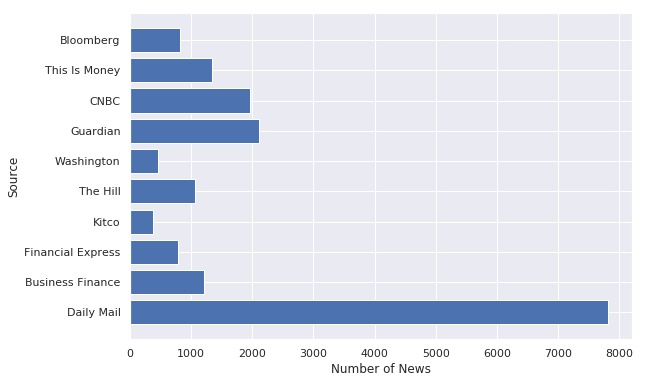

In [11]:
firms = all_data['source'].unique().tolist()
nums = []
for i in firms:
  nums.append(alldata[alldata['source']==i].shape[0])
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))

# Add the x-axis and the y-axis to the plot
ax.barh(firms, nums)

# Set title and labels for axes
ax.set(ylabel="Source", xlabel="Number of News")

fig.show()

fig.savefig('numbysource.png', bbox_inches = 'tight', pad_inches = 0)

### plot by date

In [0]:
from datetime import date
import pytz
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

def plotbysource(name, start_date=datetime(2019, 5, 1, 0, 0, 0, tzinfo=pytz.UTC)):
  df = alldata[alldata['source']==name]
  df = df[df['publish_date']>=start_date]
  
  countsbydate = df.groupby('byday').count()
  countsbydate = pd.DataFrame({'date':countsbydate.index, 'num':countsbydate.source})
  # Create the plot space upon which to plot the data
  fig, ax = plt.subplots(1, 2, figsize=(24, 4))

  # Add the x-axis and the y-axis to the plot
  ax[0].plot(countsbydate.date,
          countsbydate.num, '-o',
          color='purple')

  # Set title and labels for axes
  ax[0].set(xlabel="Date",
         ylabel="Number of News",
         title=name)
  
#   Clean up the x axis dates
  ax[0].xaxis.set_major_formatter(DateFormatter("%y-%m"))
  ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

  
  textlen = df.groupby('byday')['length'].mean()
  textlen = pd.DataFrame({'date':textlen.index, 'length':textlen.values})
  # Create the plot space upon which to plot the data

  # Add the x-axis and the y-axis to the plot
  ax[1].plot(textlen.date,
          textlen.length, '-o')

  # Set title and labels for axes
  ax[1].set(xlabel="Date",
         ylabel="Average of News Length",
         title=name)
  
#   Clean up the x axis dates
  ax[1].xaxis.set_major_formatter(DateFormatter("%y-%m"))
  ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

  fig.show()
  
  fig.savefig(name+'.png', bbox_inches = 'tight', pad_inches = 0)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


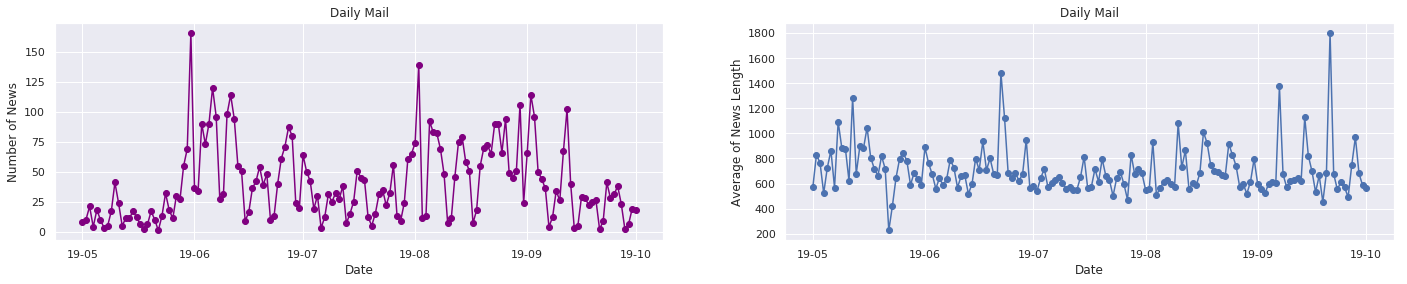

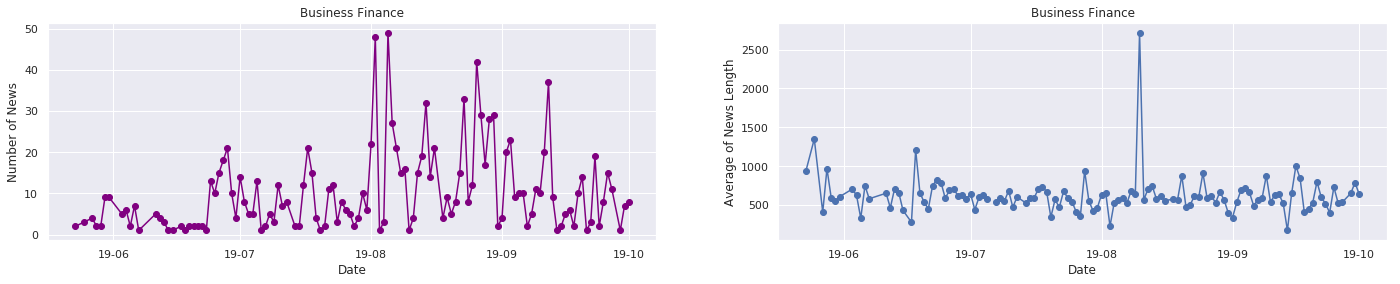

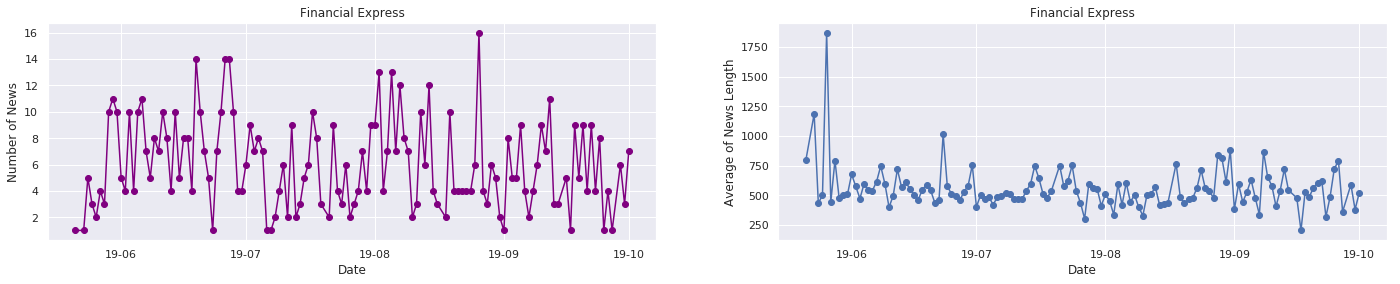

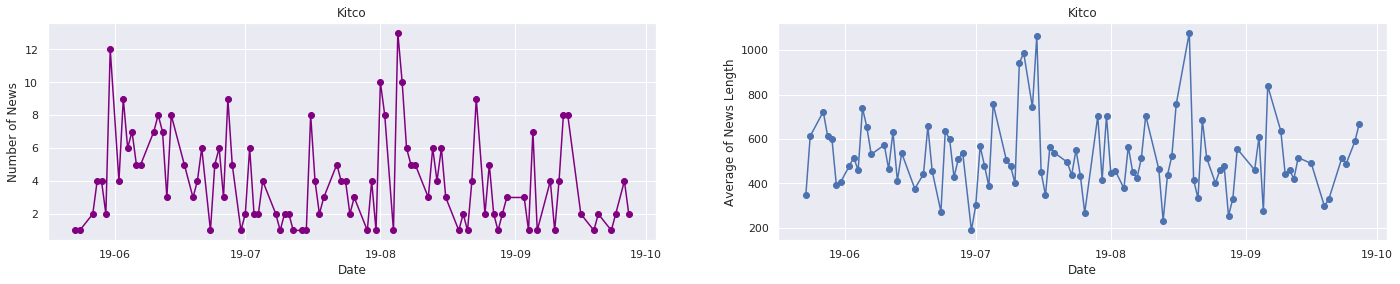

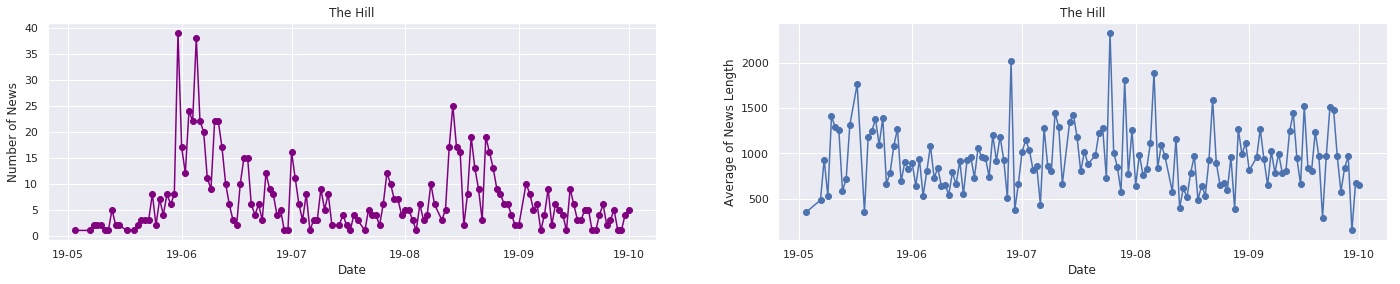

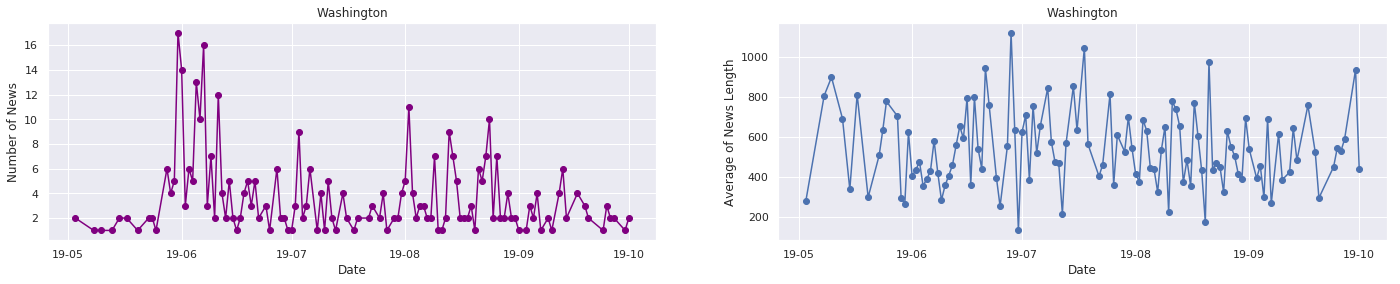

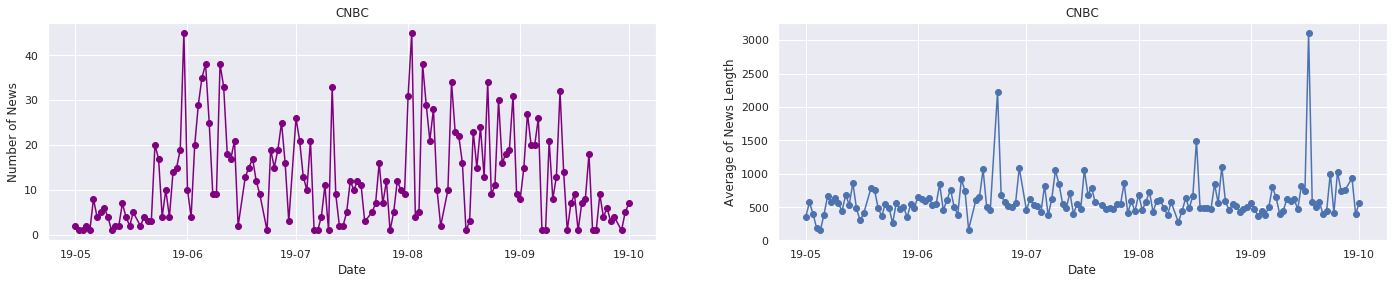

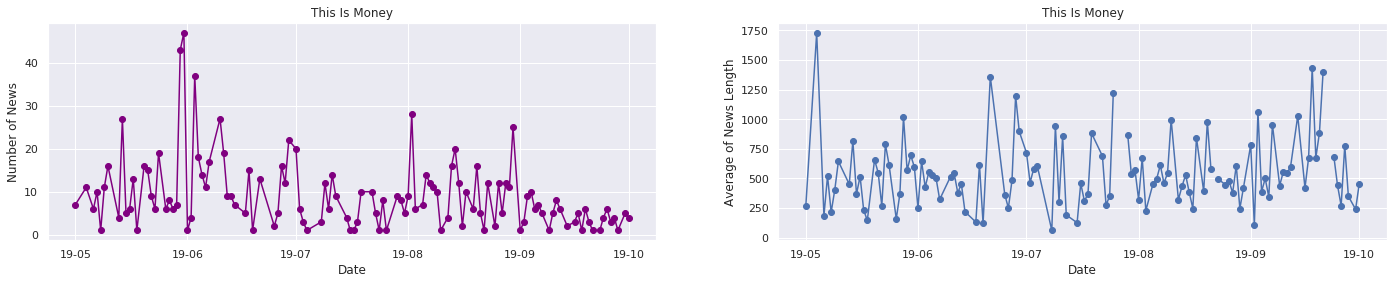

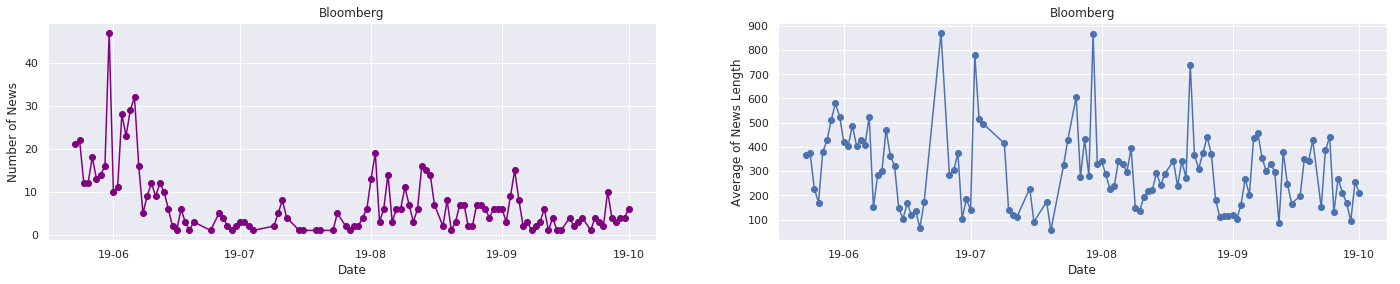

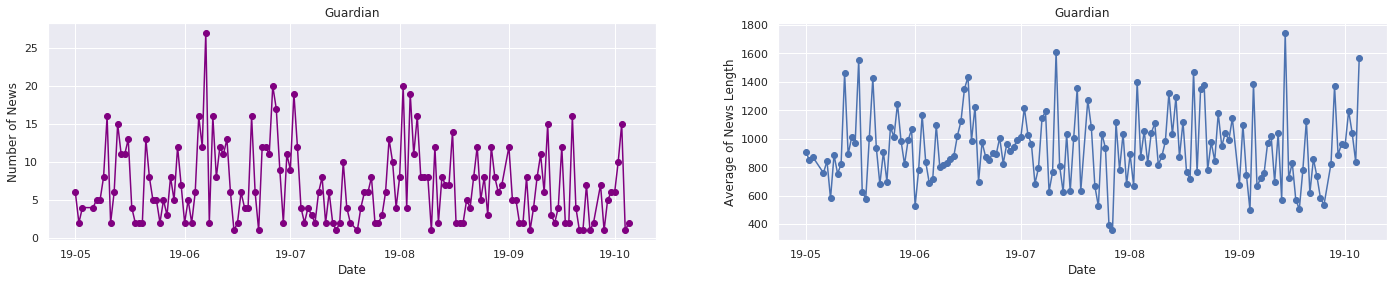

In [13]:
plotbysource("Daily Mail")
plotbysource("Business Finance")
plotbysource("Financial Express")
plotbysource("Kitco")
plotbysource("The Hill")
plotbysource("Washington")
plotbysource("CNBC")
plotbysource("This Is Money")
plotbysource("Bloomberg")
plotbysource("Guardian")

In [0]:
start_date=datetime(2019, 5, 1, 0, 0, 0, tzinfo=pytz.UTC)
df = alldata[alldata['publish_date']>=start_date]
countsbydate = df.groupby(['byday', 'source'])['source'].count()
textlen = df.groupby(['byday', 'source'])['length'].mean()
countsbydate = pd.DataFrame(countsbydate)
textlen = pd.DataFrame(textlen)

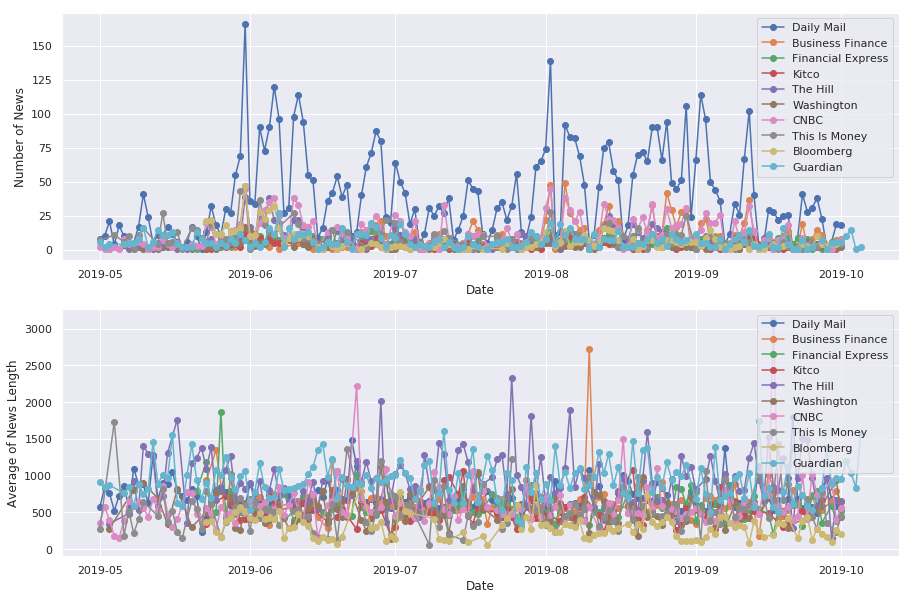

In [15]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(2, 1, figsize=(15, 10))

# Add the x-axis and the y-axis to the plot

webs = ['Daily Mail', 'Business Finance', 'Financial Express', 'Kitco', 'The Hill', 'Washington', "CNBC", "This Is Money", "Bloomberg", "Guardian"]

for i in webs:
  a = countsbydate.xs(i, level='source')
  ax[0].plot(a.index, a.values, '-o', label=i)
  b = textlen.xs(i, level='source')
  ax[1].plot(b.index, b.values, '-o', label=i)

# Set title and labels for axes
ax[0].legend()
ax[0].set(xlabel="Date",
       ylabel="Number of News")

# Set title and labels for axes
ax[1].legend()
ax[1].set(xlabel="Date", ylabel="Average of News Length")

fig.show()

fig.savefig('plot.png', bbox_inches = 'tight', pad_inches = 0)

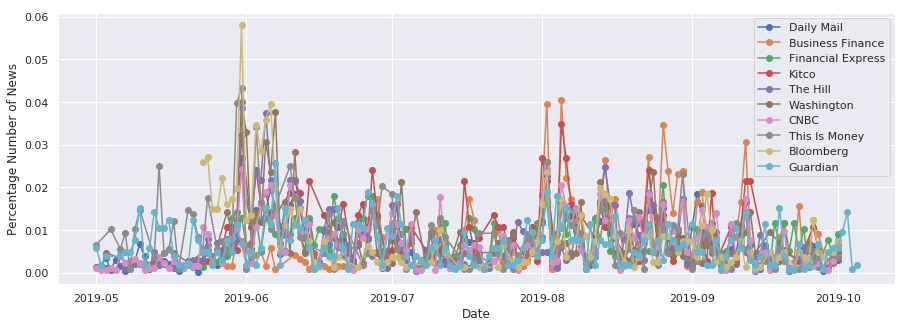

In [16]:
import numpy as np
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 5))

# Add the x-axis and the y-axis to the plot

webs = ['Daily Mail', 'Business Finance', 'Financial Express', 'Kitco', 'The Hill', 'Washington', "CNBC", "This Is Money", "Bloomberg", "Guardian"]

for i in webs:
  a = countsbydate.xs(i, level='source')
  total = np.sum(a.values)
  ax.plot(a.index, a.values/total, '-o', label=i)

# Set title and labels for axes
ax.legend()
ax.set(xlabel="Date",
       ylabel="Percentage Number of News")

fig.show()

fig.savefig('further.png', bbox_inches = 'tight', pad_inches = 0)